In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
import random


# Q1

In [3]:
from tensorflow.keras.datasets import cifar10

((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [4]:
trainY=trainY.reshape(len(trainY))
testY=testY.reshape(len(testY))

In [5]:
trainX.transpose(0,2,3,1)
trainX.shape

(50000, 32, 32, 3)

# Q2

In [6]:
def rotation(image):
    
    theta=math.radians(random.randint(0,360))
    height=image.shape[0]                                   
    width=image.shape[1] 

    rotated = np.zeros((height,width,3))
    
    centre_h=round(((height+1)/2)-1)
    centre_w=round(((width+1)/2)-1)

    
    for i in range(32):
        for j in range(32):
            x=height-1-(i+centre_h)                   
            y=width-1-(j+centre_w)                      

            new_x=round(-y*math.sin(theta)+x*math.cos(theta))
            new_y=round(y*math.cos(theta)+x*math.sin(theta))

            new_x=centre_h-new_x
            new_y=centre_w-new_y

            if 0 <= new_y < width and 0 <= new_x < height and new_x>=0 and new_y>=0:
                rotated[new_x,new_y,:]=image[i,j,:]                          
    
    return (rotated).astype(np.uint8)

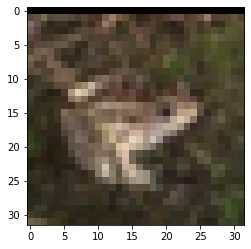

In [7]:
img1=trainX[22]

def random_crop(img1):
    plt.imshow(img1)
    pad1=np.zeros((32,2,3))
    pad2=np.zeros((2,36,3))
    newimg=np.concatenate((pad1,img1,pad1),axis=1)
    newimg=np.concatenate((pad2,newimg,pad2),axis=0)
    x=np.random.randint(0,3)
    y=np.random.randint(0,3)
    cropped=newimg[x:x+32]
    _,cropped,_=np.split(cropped,[y,y+32],axis=1)
    return cropped/255

crop=random_crop(img1)
plt.imshow(crop)

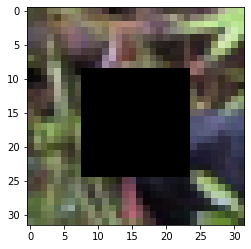

In [8]:
def random_cutout(img2):
    xx=np.random.randint(0,16)
    yy=np.random.randint(0,16)

    for i in range(16):
        for j in range(16):
            img2[xx+i][yy+j]=np.array([0,0,0])
    return img2/255

img2=trainX[24]
cutout=random_cutout(img2)
plt.imshow(cutout)

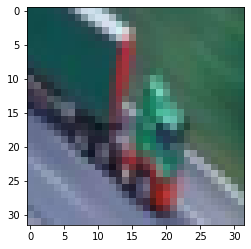

In [9]:
def flipped(img4):
    
    alpha=np.random.random()*1.5+0.5
    img4=(img4-128/255)*alpha+128/255
    img4=np.clip(img4,0,255)
    prob=np.random.randint(2)
    if(prob):
        img4=np.fliplr(img4)

    return img4/255

img4=trainX[50]
plt.imshow(img4)

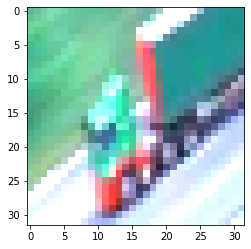

In [10]:
#With contrast and flip
flip=flipped(img4)
plt.imshow(flip)

# Q3

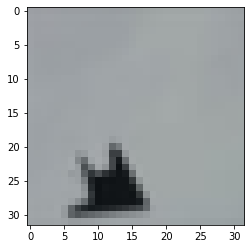

In [ ]:
augdata=trainX.copy()
c=[]
for i in range(50000):
  rand=np.random.randint(4)
  if(rand==0):
    ig=rotation(trainX[i])
  elif(rand==1):
    ig=random_crop(trainX[i])
  elif(rand==2):
    ig=random_cutout(trainX[i])
  else:
    ig=flipped(trainX[i])
  c.append(ig)


aug=np.array(c)
augdata=np.concatenate((augdata,aug))
augdata.shape

# Q4

In [12]:
from feature_extractor import *

In [ ]:
import cv2

featex=BBResNet18()

def resize(img5):

  img5=img5.astype("float32")/255
  bb=cv2.resize(img5,(224,224))
  bb=bb[:,:,:,np.newaxis].transpose(3,2,0,1)
  aa=featex.feature_extraction(bb)
  return aa[0]




Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
features1a=[]
for xx in range(len(trainX)):

  out1=resize(trainX[xx])
  features1a.append(out1)
#   print(xx)

# input
features1a=pd.DataFrame(features1a)
features1a

In [ ]:
features1a.to_csv("1.csv",index=False)

In [ ]:
features2=[]

for xx in range(50000,len(augdata)):

  out2=resize(augdata[xx])
  features2.append(out2)
#   print(xx)


In [ ]:
features2b=pd.DataFrame(features2)

features2=pd.concat([features1a,features2b])
features2.to_csv("2.csv",index=False)

In [ ]:
features3=[]
for xx in range(len(testX)):

  out3=resize(testX[xx])
  features3.append(out3)
#   print(xx)


In [ ]:
features3=pd.DataFrame(features3)
features3.to_csv("3.csv",index=False)

In [13]:
Xtr=pd.read_csv("1.csv")
Xaug=pd.read_csv("2.csv").reset_index(drop=True)
Xtest=pd.read_csv("3.csv")

In [14]:
newy=np.zeros((trainY.size,10))
newy[np.arange(trainY.size),trainY]=1

testy=np.zeros((testY.size,10))
testy[np.arange(testY.size),testY]=1

Ytr=newy
Yaug=np.concatenate((newy,newy))
Ytest=testy

# Q5

In [15]:
def relu(x):
  x[x<=0]=0
  return x


def softmax(vector):

    ex=np.exp(vector)
    return ex/np.sum(ex,axis=1).reshape(len(vector),1)

def forwardpass(X1,W1,W2,b1,b2):

  Z1=np.dot(X1,W1)+b1
  A1=relu(Z1)
  Z2=np.dot(A1,W2)+b2
  A2=softmax(Z2)
  # print(A2)

  cache={"Z1":Z1,"A1":A1,"Z2":Z2,"A2":A2}

  return A2,cache


# Q6 and Q7

In [16]:
def crossentropy(y,ypred):
  l=y.shape[0]

  loss=-(1/l)*np.sum(y*np.log(ypred) )

  return loss

In [26]:
def backwardpass(cache,W1,W2,b1,b2,X,Y,lr=0.02):
  A1=cache['A1']
  A2=cache['A2']
  Z1=cache['Z1']

  Z1[Z1<=0]=0
  Z1[Z1>0]=1
  
  dZ2=A2-Y
  
  l=len(X)
  
  dW2= (1/l)*np.dot(A1.T,dZ2)
  db2=(1/l)*np.sum(dZ2,axis=0)

  dZ1=np.multiply(Z1,np.dot(dZ2,W2.T))
  dW1=(1/l)*np.dot(X.T,dZ1)
  db1=(1/l)*np.sum(dZ1,axis=0)

  W1 = W1-lr*dW1
  W2 = W2-lr*dW2

  b1 = b1-lr*db1
  b2 = b2-lr*db2

  return W1,W2,b1,b2

In [50]:
def NNmodel(X,Y,W1,W2,b1,b2,batchsize=200,lr=0.02):
  maincache=[]
  pred=[]
  numofbatches=int(len(X)/batchsize)
  losses=[]
  for i in range(numofbatches):

    batch=X.loc[batchsize*i:batchsize*(i+1)-1].astype("float64")

    label=Y[batchsize*i:batchsize*(i+1)].astype("float64")

    out,cache=forwardpass(batch, W1,W2,b1,b2)

    W1,W2,b1,b2=backwardpass(cache,W1,W2,b1,b2,batch,label,lr=0.02)


    #if(i%100==0): 
    losses.append(crossentropy(label,out))

  loss=sum(losses)/len(losses)
  print("Loss:",loss)


  return W1,W2,b1,b2,loss



In [51]:
def trainmodel(X,Y,epochs=50,batchsize=200,lr=0.02):
    dim1=512
    dim2=64
    dim3=10
    W1=np.random.random((dim1,dim2))*0.001
    W2=np.random.random((dim2,dim3))*0.001
    b1=np.random.random((dim2,))*0.001
    b2=np.random.random((dim3,))*0.001

    losss=[]
    for epoch in range(epochs):
        W1,W2,b1,b2,loss=NNmodel(X,Y,W1,W2,b1,b2,batchsize,lr)
        losss.append(loss)

    return W1,W2,b1,b2,losss

def accuracy(y,ypred):

  acc = np.sum(np.equal(y, ypred)) / len(y)
  return acc



In [52]:
#Training on non augmented data

xtr1=Xtr
ytr1=Ytr
epochs=50
lr=0.02
batchsize=200
w1x,w2x,b1x,b2x,loss1=trainmodel(xtr1,ytr1,epochs,batchsize,lr)


Loss: 2.302800229563441
Loss: 2.28754990282616
Loss: 2.136990964550078
Loss: 1.9581220304859985
Loss: 1.8289289443044094
Loss: 1.716918032789374
Loss: 1.6105303760385774
Loss: 1.5135152164518186
Loss: 1.4319997970957599
Loss: 1.367855417268941
Loss: 1.3185849538686374
Loss: 1.279987433107818
Loss: 1.248661346703696
Loss: 1.2222674781305585
Loss: 1.1991938366009425
Loss: 1.1784869977370964
Loss: 1.1593340565190506
Loss: 1.1412252494700224
Loss: 1.1238315882949417
Loss: 1.1070989796267883
Loss: 1.091076043711451
Loss: 1.0758221885771966
Loss: 1.0615314242956035
Loss: 1.048181144022055
Loss: 1.0357735851011467
Loss: 1.0243566955362
Loss: 1.0137179953288964
Loss: 1.003825410857051
Loss: 0.9946276302697413
Loss: 0.9860190475901671
Loss: 0.9779197038973202
Loss: 0.9702804842350651
Loss: 0.9630544701941621
Loss: 0.9562142740384396
Loss: 0.9497397131696346
Loss: 0.9435967059373628
Loss: 0.9377505481224004
Loss: 0.9322069086129215
Loss: 0.9269269755363326
Loss: 0.9219149524025116
Loss: 0.917138

In [39]:
# Saving weights
np.save("W1x",w1x)
np.save("W2x",w2x)
np.save("b1x",b1x)
np.save("b2x",b2x)

In [40]:
#Loading weights

#Non aug data
w1x=np.load("W1x.npy")
w2x=np.load("W2x.npy")
b1x=np.load("b1x.npy")
b2x=np.load("b2x.npy")

In [41]:
#Accuracy on non aug data

xtest1=Xtest
ytest1=Ytest

ypred1,_=forwardpass(xtest1,w1x,w2x,b1x,b2x)

ypred1=np.argmax(ypred1, axis=1)
ytest1=np.argmax(ytest1, axis=1)
accuracy(ytest1,ypred1)


0.7404

In [53]:
#Training on augmented data

xtr2=Xaug
ytr2=Yaug
w1y,w2y,b1y,b2y,loss2=trainmodel(xtr2,ytr2)


Loss: 2.3027319295829063
Loss: 2.2832372044290916
Loss: 2.1822957412052024
Loss: 2.104429285790641
Loss: 2.037727897806312
Loss: 1.9678044554370913
Loss: 1.9040880635002957
Loss: 1.8542907674945375
Loss: 1.8157059470755041
Loss: 1.7852658448431151
Loss: 1.7605065890025418
Loss: 1.7395847505372708
Loss: 1.7212690447685097
Loss: 1.7048005058143498
Loss: 1.689816238925467
Loss: 1.6762037449294844
Loss: 1.6638711931807602
Loss: 1.6526899256800431
Loss: 1.6425681480712406
Loss: 1.6333772012367545
Loss: 1.625038015021213
Loss: 1.6174221166441822
Loss: 1.610471814505885
Loss: 1.6041177131904976
Loss: 1.5982827161927124
Loss: 1.592907449657982
Loss: 1.5879350619037682
Loss: 1.5833169488079688
Loss: 1.579017093473401
Loss: 1.575002597909233
Loss: 1.571237362305776
Loss: 1.5676900882990523
Loss: 1.5643487384346082
Loss: 1.5611997286278858
Loss: 1.5582208290256925
Loss: 1.5553911694488798
Loss: 1.5527087255127512
Loss: 1.5501578203218023
Loss: 1.5477276004745817
Loss: 1.5454147708822472
Loss: 1.5

In [43]:
#Saving weights

np.save("W1y",w1y)
np.save("W2y",w2y)
np.save("b1y",b1y)
np.save("b2y",b2y)

In [44]:
#Loading weights

#Aug data
w1y=np.load("W1y.npy")
w2y=np.load("W2y.npy")
b1y=np.load("b1y.npy")
b2y=np.load("b2y.npy")

In [45]:
#Accuracy on non aug data

xtest2=Xtest
ytest2=Ytest

ypred2,_=forwardpass(xtest2,w1y,w2y,b1y,b2y)

ypred2=np.argmax(ypred2, axis=1)
ytest2=np.argmax(ytest2, axis=1)
accuracy(ytest2,ypred2)


0.7175

In [49]:
from sklearn.metrics import classification_report

print(classification_report(ytest1,ypred1))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1000
           1       0.84      0.85      0.85      1000
           2       0.70      0.52      0.59      1000
           3       0.53      0.64      0.58      1000
           4       0.71      0.68      0.70      1000
           5       0.71      0.64      0.67      1000
           6       0.74      0.84      0.79      1000
           7       0.77      0.79      0.78      1000
           8       0.77      0.86      0.82      1000
           9       0.84      0.84      0.84      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



In [48]:
print(classification_report(ytest2,ypred2))

              precision    recall  f1-score   support

           0       0.88      0.65      0.75      1000
           1       0.65      0.93      0.77      1000
           2       0.78      0.48      0.60      1000
           3       0.58      0.54      0.56      1000
           4       0.72      0.63      0.67      1000
           5       0.61      0.72      0.66      1000
           6       0.76      0.83      0.79      1000
           7       0.66      0.84      0.74      1000
           8       0.79      0.80      0.79      1000
           9       0.86      0.76      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.71     10000
weighted avg       0.73      0.72      0.71     10000



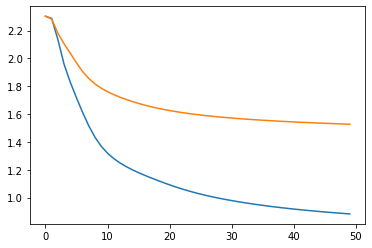

In [60]:
# Loss vs epochs graph of model 1("Blue") and model 2("Orange")
plt.plot(range(epochs),loss1)
plt.plot(range(epochs),loss2)